# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [80]:
ans0 = 'There were 17 campaigns from betweeen May 2008 to Nov 2010.'

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [81]:
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc as skl_auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [82]:
df0 = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [83]:
df0.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [84]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The Business Objective is to predict marketing/sales calls that will convert a lead into a paying customer. Using AIML classification models and methods, sales leads can be profiled and classified to: 

    1 "likely to convert", or 
    0 "unlikely to convert".  

This has business value as it allows sales agents to forecast and prioritize whom they will call from their sales leads. Thus their activities can be made more efficient than simply calling people from leads lists, without any further business inteligence. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

NOTE to reader - uncomment one of batch_1 or batch_2 sections/cells below. One of these batches can be run through all four models at a time. Their results can then be compared and contrasted. 


In [85]:
"""
batch = 'batch_1'

df1 = df0.drop(['marital','default','housing','loan','contact','month','day_of_week'
          ,'poutcome' ,'education','job'] ,axis=1) 

df1['y1'] = df1['y']
df1.loc[(df1['y']=='yes'),'y1'] = 1
df1.loc[(df1['y']=='no' ),'y1'] = 0
df1['y1'] = df1['y1'].astype(int)

X0 = df1.drop( ['y','y1'],axis=1) 
y0 = df1.y 
y1 = df1.y1

"""


"\nbatch = 'batch_1'\n\ndf1 = df0.drop(['marital','default','housing','loan','contact','month','day_of_week'\n          ,'poutcome' ,'education','job'] ,axis=1) \n\ndf1['y1'] = df1['y']\ndf1.loc[(df1['y']=='yes'),'y1'] = 1\ndf1.loc[(df1['y']=='no' ),'y1'] = 0\ndf1['y1'] = df1['y1'].astype(int)\n\nX0 = df1.drop( ['y','y1'],axis=1) \ny0 = df1.y \ny1 = df1.y1\n\n"

In [86]:


batch = 'batch_2'

#df0 = pd.read_csv('bank-additional-full.csv',sep=';')
#print(f'df0.shape  a  {df0.shape }')

#df0.drop(['marital','default','housing','loan','contact','month','day_of_week'
#          ,'poutcome' ,'education','job'] ,axis=1 , inplace=True) 

#df1 = df0.drop(['marital','default','housing','loan','contact','month','day_of_week'
#          ,'poutcome' ,'education','job'] ,axis=1) 


df1 = df0[['duration','month','pdays','previous','poutcome','y']]
print(f'df1.shape    {df1.shape }')
grp0 = df1.groupby(by= ['month','pdays','y']).size()
print(f'grp0  {grp0} ')
grp1 = df1.groupby(by= ['poutcome']).size()
print(f'grp1  {grp1} ')



print(f'df1.head()   \n{df1.head() }')
print(f'mtj_000 a ')



df1['month1'] = df1['month']
df1.loc[(df1['month']=='jan'),'month1'] =  1
df1.loc[(df1['month']=='feb'),'month1'] =  2
df1.loc[(df1['month']=='mar'),'month1'] =  3
df1.loc[(df1['month']=='apr'),'month1'] =  4
df1.loc[(df1['month']=='may'),'month1'] =  5
df1.loc[(df1['month']=='jun'),'month1'] =  6
df1.loc[(df1['month']=='jul'),'month1'] =  7
df1.loc[(df1['month']=='aug'),'month1'] =  8
df1.loc[(df1['month']=='sep'),'month1'] =  9
df1.loc[(df1['month']=='oct'),'month1'] = 10
df1.loc[(df1['month']=='nov'),'month1'] = 11
df1.loc[(df1['month']=='dec'),'month1'] = 12
df1['month1'] = df1['month1'].astype(int)

df1['poutcome1'] = df1['poutcome']
df1.loc[(df1['poutcome']=='failure'     ),'poutcome1'] = 1
df1.loc[(df1['poutcome']=='nonexistent' ),'poutcome1'] = 2
df1.loc[(df1['poutcome']=='success'     ),'poutcome1'] = 3
df1['poutcome1'] = df1['poutcome1'].astype(int)

df1['y1'] = df1['y']
df1.loc[(df1['y']=='yes'),'y1'] = 1
df1.loc[(df1['y']=='no' ),'y1'] = 0
df1['y1'] = df1['y1'].astype(int)

X0 = df1.drop( ['y','y1','month','poutcome'],axis=1) 
y0 = df1.y 
y1 = df1.y1


#
#X0_train, X0_test, y0_train, y0_test = train_test_split(X0,y1
#                               ,random_state=442,stratify=y1)
#
##self._X0_train = X0_train
##self._X0_test  = X0_test 
##self._y0_train = y0_train
##self._y0_test  = y0_test 
#
#print(f'X0_train.shape   {X0_train.shape }')
#print(f'X0_test.shape    {X0_test.shape  }')
#print(f'y0_train.shape   {y0_train.shape }')
#print(f'y0_test.shape    {y0_test.shape  }')
#
#print(f'type(X0_train)   {type(X0_train) }')
#print(f'type(X0_test)    {type(X0_test)  }')
#print(f'type(y0_train)   {type(y0_train) }')
#print(f'type(y0_test)    {type(y0_test)  }')
#


df1.shape    (41188, 6)
grp0  month  pdays  y  
apr    0      yes      3
       1      no       4
       2      no      11
              yes     20
       4      yes      2
                    ... 
sep    18     no       3
       19     no       1
       22     yes      1
       999    no     274
              yes    135
Length: 258, dtype: int64 
grp1  poutcome
failure         4252
nonexistent    35563
success         1373
dtype: int64 
df1.head()   
   duration month  pdays  previous     poutcome   y
0       261   may    999         0  nonexistent  no
1       149   may    999         0  nonexistent  no
2       226   may    999         0  nonexistent  no
3       151   may    999         0  nonexistent  no
4       307   may    999         0  nonexistent  no
mtj_000 a 


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [87]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0,y1
                               ,random_state=442,stratify=y1)

y0_test_list   = y0_test.to_list()
self_confusion = []


print(f'X0_train.shape   {X0_train.shape }')
print(f'X0_test.shape    {X0_test.shape  }')
print(f'y0_train.shape   {y0_train.shape }')
print(f'y0_test.shape    {y0_test.shape  }')

print(f'type(X0_train)   {type(X0_train) }')
print(f'type(X0_test)    {type(X0_test)  }')
print(f'type(y0_train)   {type(y0_train) }')
print(f'type(y0_test)    {type(y0_test)  }')

X0_train.shape   (30891, 5)
X0_test.shape    (10297, 5)
y0_train.shape   (30891,)
y0_test.shape    (10297,)
type(X0_train)   <class 'pandas.core.frame.DataFrame'>
type(X0_test)    <class 'pandas.core.frame.DataFrame'>
type(y0_train)   <class 'pandas.core.series.Series'>
type(y0_test)    <class 'pandas.core.series.Series'>


In [88]:

def dtp_precision_thresh(self, predict_probs,y_test,thresh):
    ''' p0 predictions 
        s0 score
    '''
    #p0 = np.where(predict_probs >= thresh,'Yes','No')
    #s0 = precision_score(y_test,p0,pos_label='Yes')
    p0 = np.where(predict_probs >= thresh,1,0)
    s0 = precision_score(y_test,p0,pos_label=1)
    return s0


def dtp_recall_thresh(self, predict_probs,y_test,thresh):
    #p0 =  np.where(predict_probs >= thresh,'Yes','No')
    #s0 = recall_score(y_test,p0,pos_label='Yes')
    p0 =  np.where(predict_probs >= thresh,1,0)
    s0 = recall_score(y_test,p0,pos_label=1)
    return s0






### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [89]:
print(f'Logistic Regression')

ts0 = dt.utcnow()
lgrg0 = LogisticRegression( multi_class='ovr',max_iter=1000 
                ,random_state=42).fit(X0_train,y0_train)
ts1 = dt.utcnow()

lgrg_train_pred0 = lgrg0.predict(X0_train)
lgrg_test_pred0  = lgrg0.predict(X0_test)
lgrg_prob0       = lgrg0.predict_proba(X0_test)
lgrg_accu_train  = accuracy_score(y0_train,lgrg_train_pred0)
lgrg_accu_test   = accuracy_score(y0_test ,lgrg_test_pred0)
lgrg_roc_auc     = roc_auc_score(y0_train,lgrg_train_pred0)





Logistic Regression


### Problem 9: Score the Model

What is the accuracy of your model?

In [90]:
print(f' lgrg_accu_train { lgrg_accu_train } ')
print(f' lgrg_accu_test  { lgrg_accu_test } ')

 lgrg_accu_train 0.9052798549739406 
 lgrg_accu_test  0.904923764203166 


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [91]:
print(f'mod_0_svm()')

ts2 = dt.utcnow()
svc = SVC(verbose=True,probability=True).fit(X0_train,y0_train)
ts3 = dt.utcnow()

svm_score_test  = svc.score(X0_test,y0_test)
svm_train_pred0 = svc.predict(X0_train)
svm_test_pred0  = svc.predict(X0_test)
svm_prob0       = svc.predict_proba(X0_test)
svm_accu_test   = accuracy_score(y0_test,svm_test_pred0)
svm_accu_train  = accuracy_score(y0_train,svm_train_pred0)
svm_roc_auc     = roc_auc_score(y0_train,svm_train_pred0)




mod_0_svm()
[LibSVM]

In [92]:
print(f'mod_1_knn()')

knn0 = Pipeline([ ('scale',StandardScaler())
                 ,('knn',KNeighborsClassifier(n_neighbors=5)
                 )])
ts4 = dt.utcnow()
knn0.fit(X0_train,y0_train)
ts5 = dt.utcnow()
knn_train_pred0 = knn0.predict(X0_train)
knn_test_pred0  = knn0.predict(X0_test)
knn_prob0       = knn0.predict_proba(X0_test)
knn_accu_test   = accuracy_score(y0_test,knn_test_pred0)
knn_accu_train  = accuracy_score(y0_train,knn_train_pred0)
knn_roc_auc     = roc_auc_score(y0_train,knn_train_pred0)



mod_1_knn()


In [93]:
print(f'mod_3_dec_tre()')

ts6 = dt.utcnow()
tre0 = DecisionTreeClassifier(random_state=42).fit(X0_train,y0_train)
ts7 = dt.utcnow()

dpth0 = tre0.get_depth()
acc00 = tre0.score(X0_train,y0_train)
acc01 = tre0.score(X0_test,y0_test)
dec_tre_train_pred0 = tre0.predict(X0_train)
dec_tre_test_pred0  = tre0.predict(X0_test)
dec_tre_prob0       = tre0.predict_proba(X0_test)
dec_tre_accu_train  = accuracy_score(y0_train,dec_tre_train_pred0)
dec_tre_accu_test   = accuracy_score(y0_test ,dec_tre_test_pred0)
dec_tre_roc_auc     = roc_auc_score(y0_train,dec_tre_train_pred0)




mod_3_dec_tre()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [94]:
def dtp_precision_thresh(predict_probs,y_test,thresh):
    ''' p0 predictions 
        s0 score
    '''
    p0 = np.where(predict_probs >= thresh,1,0)
    s0 = precision_score(y_test,p0,pos_label=1)
    return s0

def dtp_recall_thresh(predict_probs,y_test,thresh):
    p0 =  np.where(predict_probs >= thresh,1,0)
    s0 = recall_score(y_test,p0,pos_label=1)
    return s0




In [95]:
def viz_0_precision_recall_threshold(y0_test,prob0,mod0):
    #def viz_0_precision_recall_threshold(self):
    ''' TODO comment.
    '''
    print(f'viz_0_precision_recall_threshold()')
    ###
    ###   vvv precision curve versus recall curve vvv
    ###

    threshold_range = np.arange(0,1,0.1)
    #print(f' threshold_range { threshold_range }')
    df8 = pd.DataFrame(columns=['threshold','precision'])
    for i0 in threshold_range:
        a0 = dtp_precision_thresh(prob0[:,1],y0_test,i0)
        b0 = dtp_recall_thresh(prob0[:,1],y0_test,i0)
        i1 = str(i0)
        a1 = str(a0)
        b1 = str(b0)
        row0 = {'threshold':i0,'precision':a0,'recall':b0}
        df8 = df8.append(row0,ignore_index=True)
        print(f'<*> i0 {mod0} { i1[:3]:5}  {a1[:4]:5} {b1[:4]:5} ')

    results_df = pd.DataFrame({'threshold': threshold_range
                #, 'precision': [precision_thresh(pred0[:, 1]
                , 'precision': [dtp_precision_thresh( prob0[:, 1]
                , y0_test, i) for i in threshold_range]})

    #print(f' results_df { results_df }')

    x0 = df8.threshold
    y0 = df8.precision
    y1 = df8.recall
    lab0 =  'precision'
    lab1 =  'recall'
    tit0 =  f'Precision/Recall Threshold Test - credit default data {mod0} {batch}'

    fig0, ax0 = plt.subplots()
    ax0.ticklabel_format(style='plain')
    sns.scatterplot(x=x0,y=y0,   alpha=1.00) 
    sns.scatterplot(x=x0,y=y1,   alpha=1.00) 
    sns.lineplot(x=x0,y=y0,   label=lab0,alpha=1.00) 
    sns.lineplot(x=x0,y=y1,   label=lab1,alpha=1.00) 
    plt.title(tit0) 
    plt.legend() 
    plt.grid()
    #plt.xticks(self._xtic0)
    plt.savefig(f'out/{batch}_viz_0_{mod0}.png')
    plt.show() 



In [96]:
def viz_1_precision_recall(y0_test,prob0,mod0):
    ''' TODO comment.
    '''
    print(f'viz_1_precision_recall()')
    ###
    ###   vvv precision recall curve vvv
    ###
    #precision, recall, boundaries = precision_recall_curve(self._y0_test
    #                                , self._svm_prob0[:, 1], pos_label=1)
    precision, recall, boundaries = precision_recall_curve(y0_test
                                    ,prob0[:, 1], pos_label=1)
    tit0 = f'Precision vs Recall from sklearn {mod0} {batch}'
    plt.plot(precision, recall, '--o')
    #plt.xticks(boundaries);
    plt.grid()
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    #plt.title('Precision vs Recall from sklearn');
    plt.title(tit0)
    #plt.xticks(self._xtic0)
    plt.savefig(f'out/{batch}_viz_1_{mod0}.png')
    plt.show()



In [97]:

def viz_2_roc_auc(y0_test,prob0,mod0):
    ''' TODO comment.
    '''
    print(f'viz_2_roc_auc()')


    ###
    ###   vvv ROC curve vvv
    ###
    #fpr,tpr,tresh_rocs = roc_curve(y0_test,prob0[:,1],pos_label=1)
    #fpr,tpr,tresh_rocs = roc_curve(self._y0_test,self._svm_prob0[:,1]
    #                               ,pos_label=1)
    fpr,tpr,tresh_rocs = roc_curve(y0_test,prob0[:,1],pos_label=1)

    lab0 = 'ROC curve'
    lab1 = 'baseline'
    tit0 = f'ROC Curve TPR vs FPR {mod0} {batch}'

    plt.plot(fpr, tpr, '--o',label=lab0)
    plt.plot(tpr, tpr,label=lab1)
    #plt.xticks(boundaries);
    plt.grid()
    plt.ylabel('tpr true positive rate')
    plt.xlabel('fpr false positive rate')
    plt.title('ROC Curve TPR vs FPR ');
    plt.title(tit0)
    #plt.xticks(self._xtic0)
    plt.savefig(f'out/{batch}_viz_2_{mod0}.png')
    plt.show()



In [98]:

def viz_3_roc_auc(y0_test,prob0,mod0):
    ''' TODO comment.
    '''
    print(f'viz_3_roc_auc()')


    ###
    ###  ROC AUC as a measure for model scoring
    ###



    #fpr,tpr,tresh_rocs = roc_curve(self._y0_test,self._svm_prob0[:,1],pos_label=1)
    fpr,tpr,tresh_rocs = roc_curve(y0_test,prob0[:,1],pos_label=1)
    tit0 = f'ROC AUC {mod0} {batch}'

    fig1, ax1 = plt.subplots()
    roc_auc_value = skl_auc(fpr,tpr)
    disp1 = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc_value)
    disp1.plot(ax=ax1)
    plt.title(tit0)
    #plt.xticks(self._xtic0)
    plt.savefig(f'out/{batch}_viz_3_{mod0}.png')
    plt.show()
    # TODO put a straight line from 0,0 to 1,1 

    print(f' roc_auc_value { roc_auc_value } ')



In [99]:
def viz_4_confusion_matrix(y0_test,pred0,mod0):
    ''' 

        NOTE 
        NOTE  https://en.wikipedia.org/wiki/Confusion_matrix
        NOTE 

        This wikipedia page ^^^ has many many good perspectives on confusion
        matrix and what it means to analyze the components in lots of sophisticated
        ways. Suggest doing a deep dive into this page and its associated linked
        pages when time permits or the occasion calls for it.
        
        PA
        11 TP
        10 FP
        01 FN
        00 TN

        P  = predicted
        A  = actual
        TP = True  Positive 
        FP = False Positive 
        FN = False Negative 
        TN = True  Negative 

    '''
    print(f'viz_4_confusion_matrix()')
    lab0 = ['one','zero']
    lab1 = ['actual','predicted']

    #      0  0  0  0  0    0  0  0  0  0    1  1  1  1  1    1  1  1  1  1
    #      0  1  2  3  4    5  6  7  8  9    0  1  2  3  4    5  6  7  8  9
    #p0 = [ 1, 1, 1, 1, 1,   1, 0, 0, 0, 0,   0, 0, 0, 0, 0,   0, 0, 0, 0, 0  ]
    #y0 = [ 1, 1, 1, 1, 0,   0, 1, 1, 1, 0,   0, 0, 0, 0, 0,   0, 0, 0, 0, 0  ]

    #p0 = self._dec_tre_test_pred0  
    #y0 = self._y0_test

    tit0 = f'Confusion Matrix {mod0} {batch}'

    #p0 = self._dec_tre_test_pred0  
    #y0 = self._y0_test.to_list()
    p0 = pred0
    y0 = y0_test

    #print(f' p0.shape \n{p0.shape}')
    #print(f' type(p0) \n{type(p0)}')
    #print(f' type(y0) \n{type(y0)}')

    #print(f' p0 \n{p0[:5]}')
    #print(f' y0 \n{y0[:5]}')


    df9 = pd.DataFrame({ 'p':p0 ,'y':y0 })
    #df9 = pd.DataFrame({ 'p':p1 ,'y':y1 })



    
    grp0 = df9.groupby(by= ['p','y']).size()
    #tn0 = df9.groupby(by= ['p','y']).query('p = 0 and y = 0').size()

    #tn0 = df9.query('p == 0 and y == 0').groupby(by= ['p','y']).size().iat[0]
    tp0 = df9.query('p == 1 and y == 1').groupby(by= ['p','y']).size()
    fp0 = df9.query('p == 1 and y == 0').groupby(by= ['p','y']).size()
    fn0 = df9.query('p == 0 and y == 1').groupby(by= ['p','y']).size()
    tn0 = df9.query('p == 0 and y == 0').groupby(by= ['p','y']).size()
    tp1 = tp0.iat[0]
    fn1 = fn0.iat[0]
    fp1 = fp0.iat[0]
    tn1 = tn0.iat[0]

    #print(f'df9  \n{df9}')
    #print(f'grp0 \n{grp0}')
    #print(f'tn0  \n{tn0}')
    #print(f'tp1    {tp1}')
    #print(f'fn1    {fn1}') 
    #print(f'fp1    {fp1}') 
    #print(f'tn1    {tn1}') 

    dct0 = { 'mod0':mod0
            ,'tp':tp1
            ,'fp':fp1
            ,'fn':fn1
            ,'tn':tn1
            }
    self_confusion.append(dct0) 

    conf0 = confusion_matrix(y0,p0,labels=[1,0])

    disp0 = ConfusionMatrixDisplay(confusion_matrix=conf0,display_labels=lab0)
    disp0.plot() 
    plt.title(tit0)
    plt.savefig(f'out/{batch}_viz_4_{mod0}.png')
    plt.show()



In [100]:


def rpt_kpis():
    ''' TODO comment.
    '''
    print(f'rpt_kpis()  {batch}')

    print(f' df0 \n{ df0.head() } ')
    print(f' X0  \n{ X0.head() } ')
    print(f' y0  \n{ y0[:5] } ')
    print(f' y1  \n{ y1[:5] } ')

    print(f' X0_train \n{ X0_train.head() } ')
    print(f' X0_test  \n{ X0_test.head() } ')
    print(f' y0_train \n{ y0_train[:5] } ')
    print(f' y0_test  \n{ y0_test[:5] } ')

    print(f' svm_score_test  \n{ svm_score_test  }')
    print(f' svm_train_pred0 \n{ svm_train_pred0 }')
    print(f' svm_test_pred0  \n{ svm_test_pred0  }')
    print(f' svm_prob0       \n{ svm_prob0       }')
    print(f' svm_accu_train  \n{ svm_accu_train  }')
    print(f' svm_accu_test   \n{ svm_accu_test   }')

    print(f' knn_train_pred0 \n{ knn_train_pred0 }')
    print(f' knn_test_pred0  \n{ knn_test_pred0  }')
    print(f' knn_prob0       \n{ knn_prob0       }')
    print(f' knn_accu_test   \n{ knn_accu_test   }')
    print(f' knn_accu_train  \n{ knn_accu_train  }')

    print(f' lgrg_train_pred0 \n{ lgrg_train_pred0 }')
    print(f' lgrg_test_pred0  \n{ lgrg_test_pred0  }')
    print(f' lgrg_prob0       \n{ lgrg_prob0       }')
    print(f' lgrg_accu_test   \n{ lgrg_accu_test   }')
    print(f' lgrg_accu_train  \n{ lgrg_accu_train  }')

    print(f' dec_tre_train_pred0 \n{ dec_tre_train_pred0 }')
    print(f' dec_tre_test_pred0  \n{ dec_tre_test_pred0  }')
    print(f' dec_tre_prob0       \n{ dec_tre_prob0       }')
    print(f' dec_tre_accu_test   \n{ dec_tre_accu_test   }')
    print(f' dec_tre_accu_train  \n{ dec_tre_accu_train  }')



def rpt_accuracy():
    ''' TODO comment.
    '''
    print(f'rpt_accuracy() {batch}')

    print(f' svm_accu_train      { round(svm_accu_train,4)     }')
    print(f' svm_accu_test       { round(svm_accu_test,4)      }')
    print(f' knn_accu_train      { round(knn_accu_train,4)     }')
    print(f' knn_accu_test       { round(knn_accu_test,4)      }')
    print(f' lgrg_accu_train     { round(lgrg_accu_train,4)    }')
    print(f' lgrg_accu_test      { round(lgrg_accu_test,4)     }')
    print(f' dec_tre_accu_train  { round(dec_tre_accu_train,4) }')
    print(f' dec_tre_accu_test   { round(dec_tre_accu_test,4)  }')
    print(f' ')
    print(f' svm_roc_auc         { round(svm_roc_auc,4)        }')
    print(f' knn_roc_auc         { round(knn_roc_auc,4)        }')
    print(f' lgrg_roc_auc        { round(lgrg_roc_auc,4)       }')
    print(f' dec_tre_roc_auc     { round(dec_tre_roc_auc,4)    }')

    print(f' confusion { self_confusion }')
    for i0,a0 in enumerate(self_confusion): 
        print(f' {i0} {a0} ')


def rpt_timing():
    ''' TODO comment.
    '''
    print(f'rpt_timing() {batch}')

    del_0_svm     = ts1 - ts0 
    del_1_knn     = ts3 - ts2 
    del_2_lgrg    = ts5 - ts4 
    del_3_dec_tre = ts7 - ts6 

    print(f'ts0  { ts0.strftime("%Y-%m-%d %H:%M:%S.%s") }')
    print(f'ts1  { ts1.strftime("%Y-%m-%d %H:%M:%S.%s") }')
    print(f'ts2  { ts2.strftime("%Y-%m-%d %H:%M:%S.%s") }')
    print(f'ts3  { ts3.strftime("%Y-%m-%d %H:%M:%S.%s") }')
    print(f'ts4  { ts4.strftime("%Y-%m-%d %H:%M:%S.%s") }')
    print(f'ts5  { ts5.strftime("%Y-%m-%d %H:%M:%S.%s") }')
    print(f'ts6  { ts6.strftime("%Y-%m-%d %H:%M:%S.%s") }')
    print(f'ts7  { ts7.strftime("%Y-%m-%d %H:%M:%S.%s") }')

    
    print(f' del_0_svm     {del_0_svm}')
    print(f' del_1_knn     {del_1_knn}')
    print(f' del_2_lgrg    {del_2_lgrg}')
    print(f' del_3_dec_tre {del_3_dec_tre}')



viz_0_precision_recall_threshold()
<*> i0 svm 0.0    0.11  1.0   
<*> i0 svm 0.1    0.58  0.44  
<*> i0 svm 0.2    0.63  0.35  
<*> i0 svm 0.3    0.63  0.30  
<*> i0 svm 0.4    0.66  0.28  
<*> i0 svm 0.5    0.67  0.25  
<*> i0 svm 0.6    0.71  0.22  
<*> i0 svm 0.7    0.69  0.18  
<*> i0 svm 0.8    0.71  0.13  
<*> i0 svm 0.9    0.78  0.05  


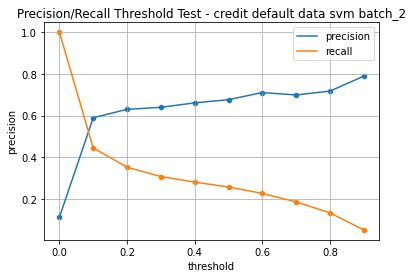

viz_1_precision_recall()


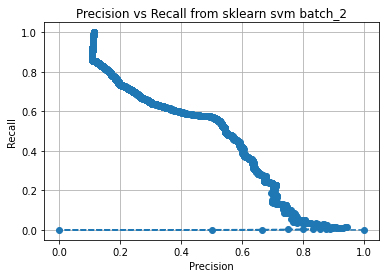

viz_2_roc_auc()


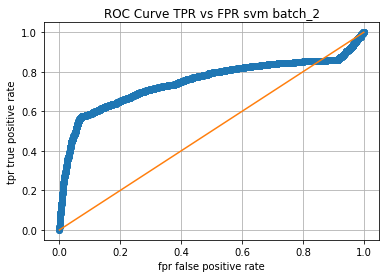

viz_3_roc_auc()


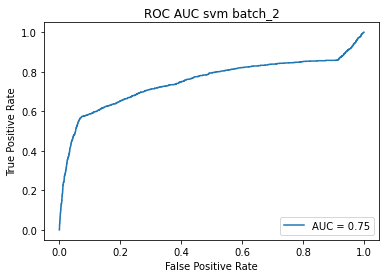

 roc_auc_value 0.7496986957161673 
viz_4_confusion_matrix()


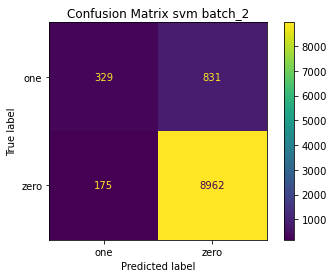

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
#viz_0_precision_recall_threshold(y0_test,svm_prob0,'svm')

viz_0_precision_recall_threshold(y0_test,svm_prob0,'svm')
viz_1_precision_recall(          y0_test,svm_prob0,'svm')
viz_2_roc_auc(                   y0_test,svm_prob0,'svm')
viz_3_roc_auc(                   y0_test,svm_prob0,'svm')
viz_4_confusion_matrix(     y0_test_list,svm_test_pred0,'svm')
svm_test_pred0


viz_0_precision_recall_threshold()
<*> i0 knn 0.0    0.11  1.0   
<*> i0 knn 0.1    0.32  0.80  
<*> i0 knn 0.2    0.32  0.80  
<*> i0 knn 0.3    0.46  0.59  
<*> i0 knn 0.4    0.46  0.59  
<*> i0 knn 0.5    0.55  0.39  
<*> i0 knn 0.6    0.63  0.23  
<*> i0 knn 0.7    0.63  0.23  
<*> i0 knn 0.8    0.63  0.23  
<*> i0 knn 0.9    0.75  0.10  


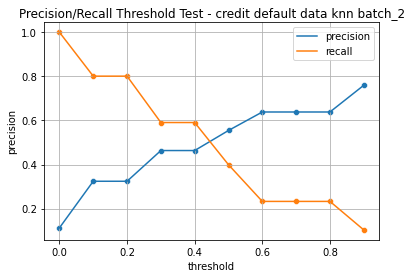

viz_1_precision_recall()


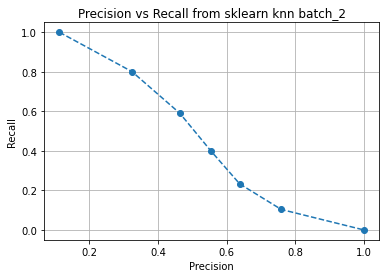

viz_2_roc_auc()


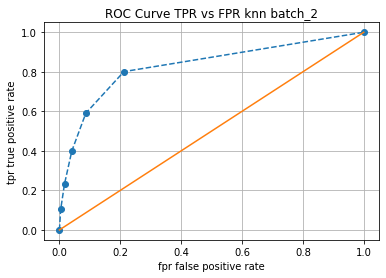

viz_3_roc_auc()


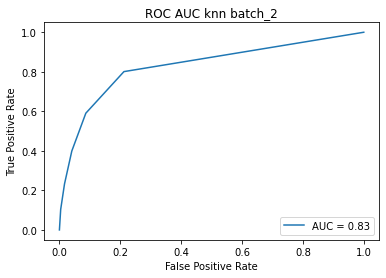

 roc_auc_value 0.8293515282689179 
viz_4_confusion_matrix()


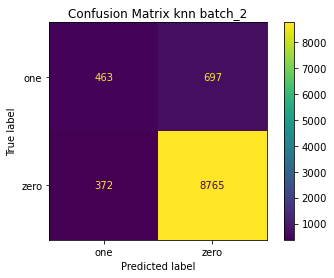

In [102]:
viz_0_precision_recall_threshold(y0_test,knn_prob0,'knn')
viz_1_precision_recall(          y0_test,knn_prob0,'knn')
viz_2_roc_auc(                   y0_test,knn_prob0,'knn')
viz_3_roc_auc(                   y0_test,knn_prob0,'knn')
viz_4_confusion_matrix(     y0_test_list,knn_test_pred0,'knn')



viz_0_precision_recall_threshold()
<*> i0 lgrg 0.0    0.11  1.0   
<*> i0 lgrg 0.1    0.36  0.73  
<*> i0 lgrg 0.2    0.51  0.55  
<*> i0 lgrg 0.3    0.57  0.46  
<*> i0 lgrg 0.4    0.60  0.39  
<*> i0 lgrg 0.5    0.64  0.34  
<*> i0 lgrg 0.6    0.65  0.25  
<*> i0 lgrg 0.7    0.67  0.16  
<*> i0 lgrg 0.8    0.69  0.10  
<*> i0 lgrg 0.9    0.63  0.05  


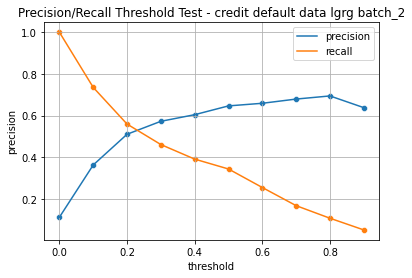

viz_1_precision_recall()


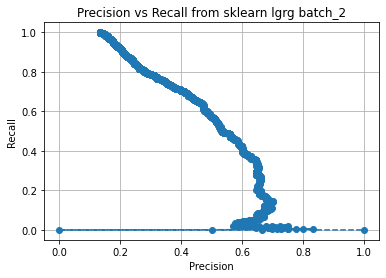

viz_2_roc_auc()


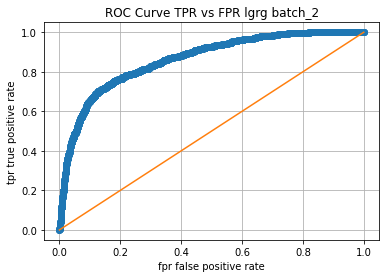

viz_3_roc_auc()


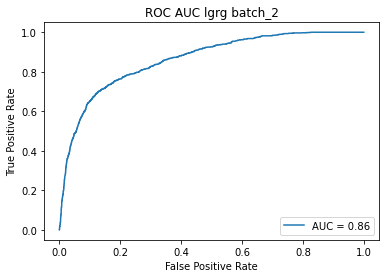

 roc_auc_value 0.8629232506708231 
viz_4_confusion_matrix()


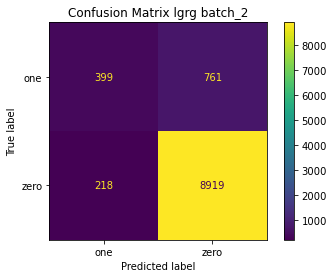

In [103]:
viz_0_precision_recall_threshold(y0_test,lgrg_prob0,'lgrg')
viz_1_precision_recall(          y0_test,lgrg_prob0,'lgrg')
viz_2_roc_auc(                   y0_test,lgrg_prob0,'lgrg')
viz_3_roc_auc(                   y0_test,lgrg_prob0,'lgrg')
viz_4_confusion_matrix(     y0_test_list,lgrg_test_pred0,'lgrg')


viz_0_precision_recall_threshold()
<*> i0 dec_tre 0.0    0.11  1.0   
<*> i0 dec_tre 0.1    0.32  0.50  
<*> i0 dec_tre 0.2    0.38  0.48  
<*> i0 dec_tre 0.3    0.43  0.46  
<*> i0 dec_tre 0.4    0.46  0.43  
<*> i0 dec_tre 0.5    0.47  0.43  
<*> i0 dec_tre 0.6    0.52  0.37  
<*> i0 dec_tre 0.7    0.53  0.37  
<*> i0 dec_tre 0.8    0.53  0.37  
<*> i0 dec_tre 0.9    0.53  0.37  


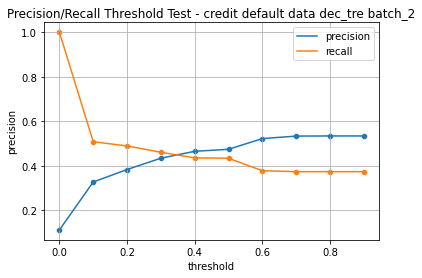

viz_1_precision_recall()


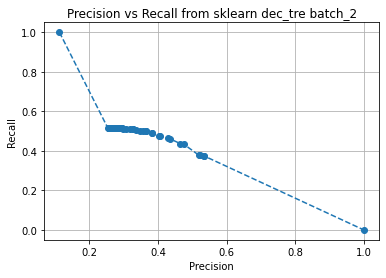

viz_2_roc_auc()


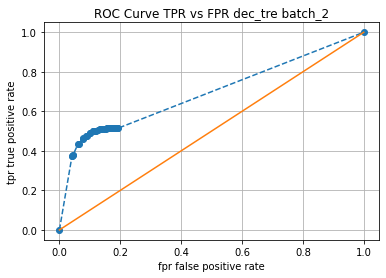

viz_3_roc_auc()


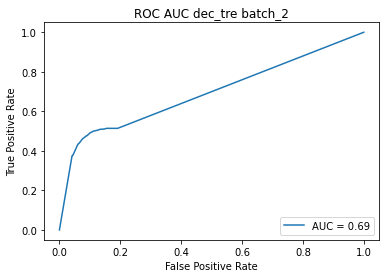

 roc_auc_value 0.6922085929509799 
viz_4_confusion_matrix()


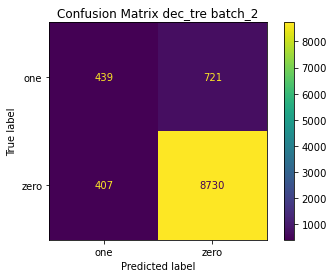

In [104]:

viz_0_precision_recall_threshold(y0_test,dec_tre_prob0,'dec_tre')
viz_1_precision_recall(          y0_test,dec_tre_prob0,'dec_tre')
viz_2_roc_auc(                   y0_test,dec_tre_prob0,'dec_tre')
viz_3_roc_auc(                   y0_test,dec_tre_prob0,'dec_tre')
viz_4_confusion_matrix(     y0_test_list,dec_tre_test_pred0,'dec_tre')



In [105]:
rpt_kpis()
rpt_accuracy()
rpt_timing()


rpt_kpis()  batch_2
 df0 
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.i

##### Questions